#Daily Step Counts

In [10]:
import pandas as pd

def load_and_process_data(csv_file):
    df = pd.read_csv(csv_file)

    # Filter for step count data
    df = df[df['type'] == 'HKQuantityTypeIdentifierStepCount']

    # Convert startDate to datetime format
    df['startDate'] = pd.to_datetime(df['startDate'])

    # Filter data starting from September 2023
    df = df[(df['startDate'] >= '2023-09-01')]

    # Extract date from the startDate and convert value to numeric
    df['date'] = df['startDate'].dt.date
    df['value'] = pd.to_numeric(df['value'], errors='coerce')

    # Group by date to get daily step counts
    daily_steps = df.groupby('date')['value'].sum().reset_index()

    return daily_steps

def list_step_counts_by_day(csv_file):
    daily_steps = load_and_process_data(csv_file)

    # Print daily step counts
    print("Daily Step Counts (from September 2023 onwards):")
    print(daily_steps)

# Replace 'apple_health_data.csv' with your actual CSV file path
csv_file = 'apple_health_data.csv'

list_step_counts_by_day(csv_file)


/var/folders/_c/jm66wb4d7gl570d8vx4_wpx00000gn/T/ipykernel_39714/3723997778.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Daily Step Counts (from September 2023 onwards):
           date    value
0    2023-09-01   4709.0
1    2023-09-02  23855.0
2    2023-09-03  28030.0
3    2023-09-04  18278.0
4    2023-09-05  21828.0
..          ...      ...
447  2024-11-21   8532.0
448  2024-11-22  10528.0
449  2024-11-23   2116.0
450  2024-11-24   8963.0
451  2024-11-25   7121.0

[452 rows x 2 columns]


#Daily Step Counts Plot

/var/folders/_c/jm66wb4d7gl570d8vx4_wpx00000gn/T/ipykernel_39714/2924598071.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


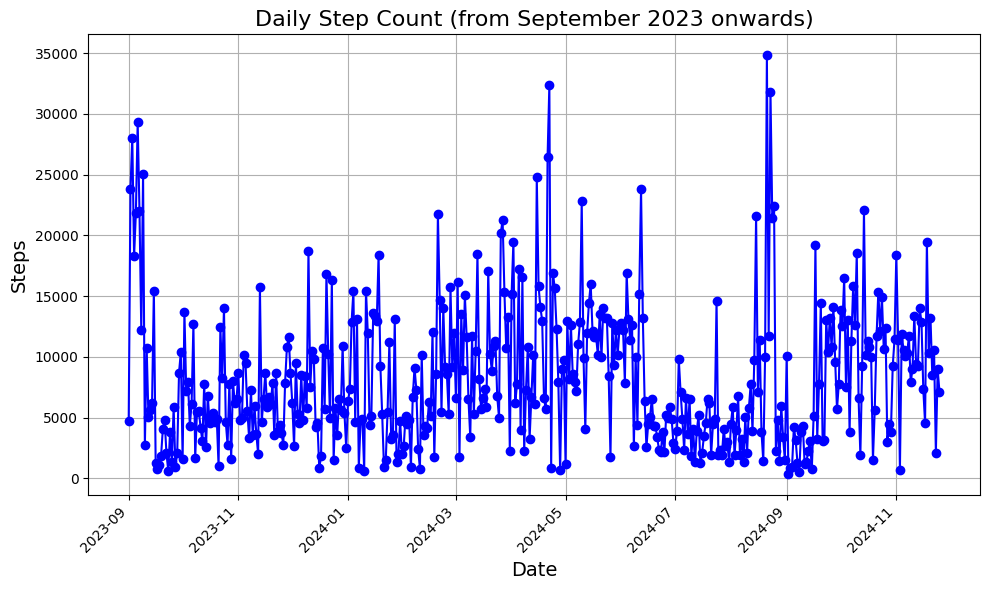

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_process_data(csv_file):
    df = pd.read_csv(csv_file)

    # Filter for step count data
    df = df[df['type'] == 'HKQuantityTypeIdentifierStepCount']

    # Convert startDate to datetime format
    df['startDate'] = pd.to_datetime(df['startDate'])

    # Filter data starting from September 2023
    df = df[(df['startDate'] >= '2023-09-01')]

    # Extract date from the startDate and convert value to numeric
    df['date'] = df['startDate'].dt.date
    df['value'] = pd.to_numeric(df['value'], errors='coerce')

    # Group by date to get daily step counts
    daily_steps = df.groupby('date')['value'].sum().reset_index()

    return daily_steps

def plot_daily_step_counts(csv_file):
    daily_steps = load_and_process_data(csv_file)

    # Plotting the daily step counts
    plt.figure(figsize=(10, 6))
    plt.plot(daily_steps['date'], daily_steps['value'], marker='o', linestyle='-', color='b')
    plt.title('Daily Step Count (from September 2023 onwards)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Steps', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Replace 'apple_health_data.csv' with your actual CSV file path
csv_file = 'apple_health_data.csv'

plot_daily_step_counts(csv_file)


#Average Monthly Step Counts

In [7]:
import pandas as pd

def load_and_process_data(csv_file):
    df = pd.read_csv(csv_file)

    # Filter for step count data
    df = df[df['type'] == 'HKQuantityTypeIdentifierStepCount']

    # Convert startDate to datetime format
    df['startDate'] = pd.to_datetime(df['startDate'])

    # Filter data starting from September 2023
    df = df[(df['startDate'] >= '2023-09-01')]

    # Extract date and month/year from the startDate
    df['date'] = df['startDate'].dt.date
    df['year_month'] = df['startDate'].dt.to_period('M')

    # Convert the value column to numeric
    df['value'] = pd.to_numeric(df['value'], errors='coerce')

    # Group by date to get daily step counts
    daily_steps = df.groupby('date')['value'].sum().reset_index()

    return df, daily_steps

def calculate_average_monthly_step_count_by_day(df):
    # Group by year_month to get total steps for each month
    monthly_steps = df.groupby('year_month')['value'].sum().reset_index()

    # Count the number of days in each month (by counting unique dates for each month)
    days_in_month = df.groupby('year_month')['date'].nunique().reset_index()
    days_in_month.columns = ['year_month', 'days_in_month']

    # Merge monthly steps and days in each month
    monthly_stats = pd.merge(monthly_steps, days_in_month, on='year_month')

    # Calculate the average daily steps for each month
    monthly_stats['avg_daily_steps'] = monthly_stats['value'] / monthly_stats['days_in_month']

    return monthly_stats[['year_month', 'avg_daily_steps']]

def list_average_monthly_step_count_by_day(csv_file):
    df, daily_steps = load_and_process_data(csv_file)

    # Calculate average monthly step count by day
    avg_monthly_steps = calculate_average_monthly_step_count_by_day(df)

    # Print the results
    print("Average Monthly Step Count by Day (from September 2023 onwards):")
    print(avg_monthly_steps)

# Replace 'apple_health_data.csv' with your actual CSV file path
csv_file = 'apple_health_data.csv'

list_average_monthly_step_count_by_day(csv_file)


/var/folders/_c/jm66wb4d7gl570d8vx4_wpx00000gn/T/ipykernel_39714/3068441303.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Average Monthly Step Count by Day (from September 2023 onwards):
   year_month  avg_daily_steps
0     2023-09      9349.633333
1     2023-10      6066.000000
2     2023-11      6572.600000
3     2023-12      7103.645161
4     2024-01      7413.096774
5     2024-02      7447.413793
6     2024-03     10200.967742
7     2024-04     11485.900000
8     2024-05     10904.354839
9     2024-06      7578.633333
10    2024-07      4214.806452
11    2024-08      8409.000000
12    2024-09      5957.366667
13    2024-10     10451.161290
14    2024-11     10119.600000


/var/folders/_c/jm66wb4d7gl570d8vx4_wpx00000gn/T/ipykernel_39714/3068441303.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['startDate'].dt.to_period('M')


#Average Monthly Step Counts Plot

/var/folders/_c/jm66wb4d7gl570d8vx4_wpx00000gn/T/ipykernel_39714/3162384465.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
/var/folders/_c/jm66wb4d7gl570d8vx4_wpx00000gn/T/ipykernel_39714/3162384465.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['startDate'].dt.to_period('M')


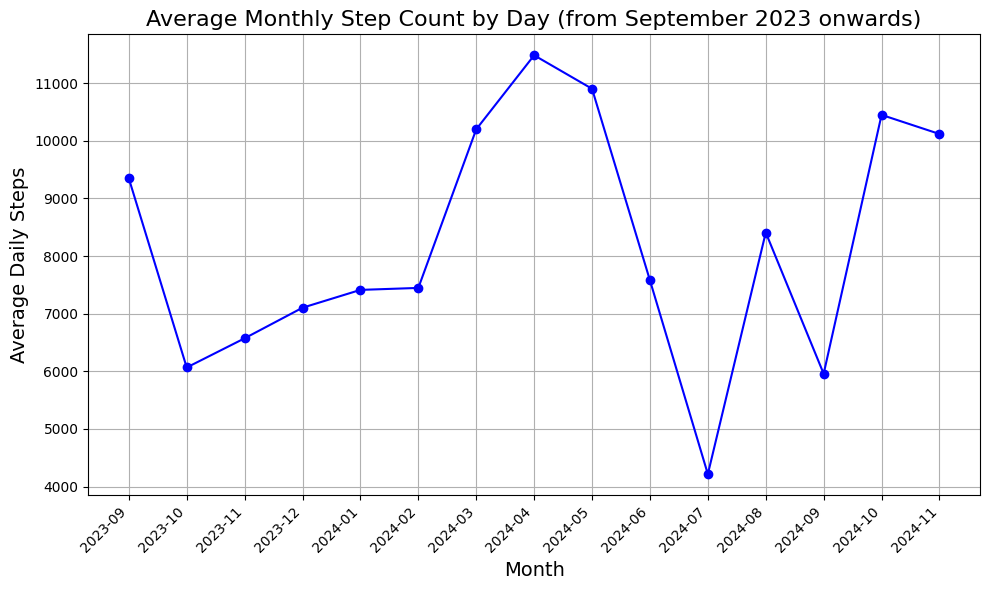

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_process_data(csv_file):
    df = pd.read_csv(csv_file)

    # Filter for step count data
    df = df[df['type'] == 'HKQuantityTypeIdentifierStepCount']

    # Convert startDate to datetime format
    df['startDate'] = pd.to_datetime(df['startDate'])

    # Filter data starting from September 2023
    df = df[(df['startDate'] >= '2023-09-01')]

    # Extract date and month/year from the startDate
    df['date'] = df['startDate'].dt.date
    df['year_month'] = df['startDate'].dt.to_period('M')

    # Convert the value column to numeric
    df['value'] = pd.to_numeric(df['value'], errors='coerce')

    # Group by date to get daily step counts
    daily_steps = df.groupby('date')['value'].sum().reset_index()

    return df, daily_steps

def calculate_average_monthly_step_count_by_day(df):
    # Group by year_month to get total steps for each month
    monthly_steps = df.groupby('year_month')['value'].sum().reset_index()

    # Count the number of days in each month (by counting unique dates for each month)
    days_in_month = df.groupby('year_month')['date'].nunique().reset_index()
    days_in_month.columns = ['year_month', 'days_in_month']

    # Merge monthly steps and days in each month
    monthly_stats = pd.merge(monthly_steps, days_in_month, on='year_month')

    # Calculate the average daily steps for each month
    monthly_stats['avg_daily_steps'] = monthly_stats['value'] / monthly_stats['days_in_month']

    return monthly_stats[['year_month', 'avg_daily_steps']]

def plot_average_monthly_step_count_by_day(avg_monthly_steps):
    # Plotting the average daily steps by month
    plt.figure(figsize=(10, 6))
    plt.plot(avg_monthly_steps['year_month'].astype(str), avg_monthly_steps['avg_daily_steps'], marker='o', linestyle='-', color='b')
    plt.title('Average Monthly Step Count by Day (from September 2023 onwards)', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Average Daily Steps', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def list_and_plot_average_monthly_step_count_by_day(csv_file):
    df, daily_steps = load_and_process_data(csv_file)

    # Calculate average monthly step count by day
    avg_monthly_steps = calculate_average_monthly_step_count_by_day(df)

    # Plot the results
    plot_average_monthly_step_count_by_day(avg_monthly_steps)

# Replace 'apple_health_data.csv' with your actual CSV file path
csv_file = 'apple_health_data.csv'

list_and_plot_average_monthly_step_count_by_day(csv_file)
